# **Content**
**The Data** - Exploratory Data Analysis

**The Variables** - Feature Selection

**The Model** - Building a Logistic Regression Model

**The Prediction** - Making Predictions with the Model

The Breast Cancer datasets is available UCI machine learning repository maintained by the University of California, Irvine.
The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.

The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

1= Malignant (Cancerous) - Present (M)
0= Benign (Not Cancerous) -Absent (B)

Extracted from the UCI ML repository

Attribute Information:
id

diagnosis: M = malignant, B = benign

Columns 3 to 32

Ten real-valued features are computed for each cell nucleus:

radius: distances from center to points on the perimeter

texture: standard deviation of gray-scale values
perimeter
area
smoothness: local variation in radius lengths

compactness: perimeter^2 / area - 1.0

concavity: severity of concave portions of the contour

concave points: number of concave portions of the contour
symmetry

fractal dimension: "coastline approximation" - 1

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [ ]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# read in the data and check the first 5 rows
df = pd.read_csv('/content/data.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

looks like the data doesnt have any null values, but the last column can be dropped since it has 0 values

In [ ]:
df = df.drop('Unnamed: 32', axis=1)
# dropping id column
df.drop('id',axis=1, inplace=True)

In [ ]:
# check the data type of each column
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

since all most all the data types are float we can avoid data conversions here except for diagnosis column

<ipython-input-43-66acbccb5508>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis", data=df, palette='magma')


<Axes: xlabel='diagnosis', ylabel='count'>

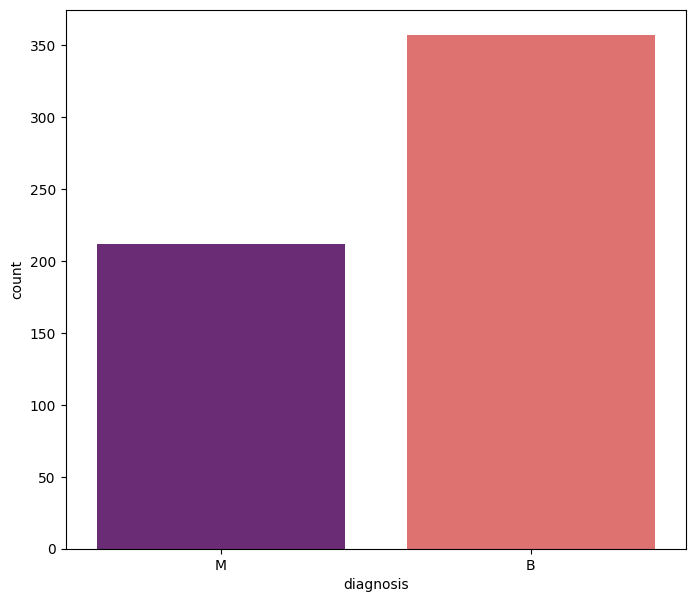

In [ ]:
# countplot
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df, palette='magma')

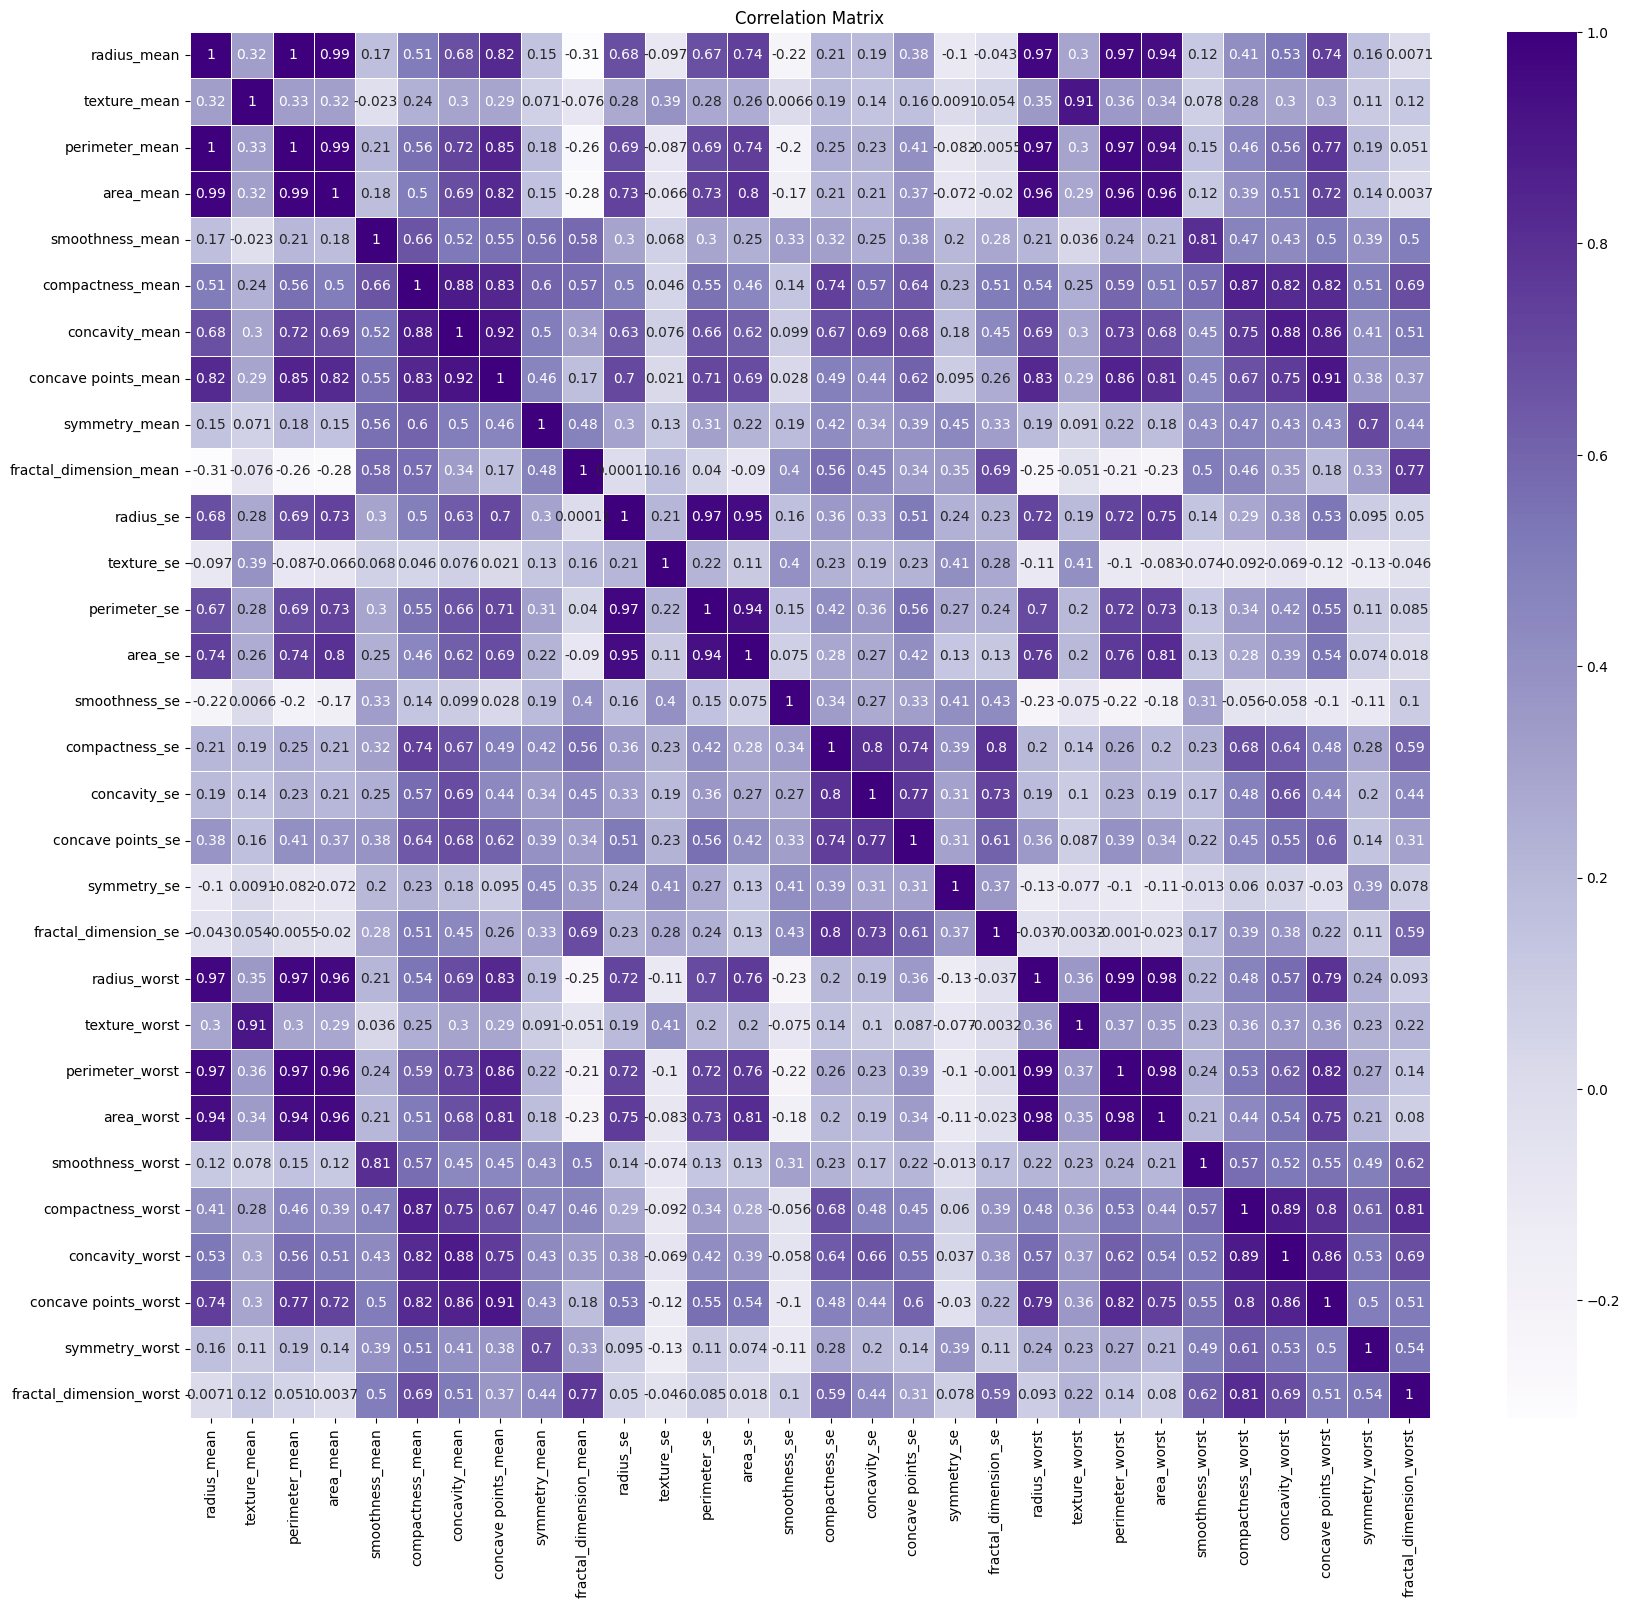

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
corr = numeric_df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr, annot=True, linewidths=.5, cmap="Purples")
plt.title('Correlation Matrix')
plt.show()



since all the coorelations are positive, we can keep all the columns for model preparation

In [ ]:
# counts of unique rows in the 'diagnosis' column
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

# 3. The Model
___

 We will start by first splitting our dataset into two parts; one as a training set for the model, and the other as a test set to validate the predictions that the model will make.

# **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 30)
Shape of test set: (114, 30)



StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.
(Unit variance means dividing all the values by the standard deviation.)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Print coefficients and intercept
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

# Print the accuracy on the training set
print("Training set accuracy:", logreg.score(X_train, y_train))

# Print the accuracy on the test set
print("Test set accuracy:", logreg.score(X_test, y_test))


Coefficients: [[ 0.42789615  0.39391343  0.38955025  0.46431618  0.06675416 -0.54210625
   0.79677127  1.1170207  -0.23571257 -0.07670117  1.27114722 -0.18863977
   0.60936581  0.90979979  0.31246106 -0.68597229 -0.18081531  0.31769168
  -0.49997976 -0.61340541  0.87861043  1.3421883   0.58755707  0.84655924
   0.54994459 -0.00520705  0.94571375  0.77343621  1.20853126  0.1541604 ]]
Intercept: [-0.44359695]
Training set accuracy: 0.9868131868131869
Test set accuracy: 0.9824561403508771


# 4. The Prediction
___

In the previous section, we have successfully developed a logistic regression model. This model can take some unlabeled data and effectively assign each observation a probability ranging from 0 to 1. This is the key feature of a logistic regression model.

In other words, instead of numbers between 0 or 1, the predictions should show "M" or "B", denoting malignant and benign respectively. In our model, a probability of 1 corresponds to the "Benign" class, whereas a probability of 0 corresponds to the "Malignant" class. Therefore, we can apply a threshhold value of 0.5 to our predictions, assigning all values closer to 0 a label of "M" and assigniing all values closer to 1 a label of "B".

If this is confusiing, let's go through this step-by-step.

To get predictions from your logistic regression model on the test set, you can use the predict method. Here's how you can get predictions for the first 5 samples in the test set:

In [ ]:
predictions = logreg.predict(X_test)
print(predictions[0:5])

[0 1 1 0 0]


If you want probabilities instead of class labels, you can use the predict_proba method:

In [ ]:
# Note how the values are numerical.
# Convert these probabilities into nominal values and check the first 5 predictions again.
predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_nominal[1:6]

['B', 'B', 'M', 'M', 'B']

We can confirm that probabilities closer to 0 have been labeled as "M", while the ones closer to 1 have been labeled as "B". Now we are able to evaluate the accuracy of our predictions by checking out the classification report and the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, predictions)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.9824561403508771


## **Building Prediction model**

In [ ]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logreg.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')


[1]
The Breast Cancer is Benign
